In [3]:
import pickle
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os
import cv2
import timm
import torch
import torch.nn as nn
import albumentations as A

from torch.utils.data import Dataset, DataLoader

In [4]:
!wget https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz

--2023-10-19 17:54:45--  https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
Resolving www.cs.toronto.edu (www.cs.toronto.edu)... 128.100.3.30
Connecting to www.cs.toronto.edu (www.cs.toronto.edu)|128.100.3.30|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 170498071 (163M) [application/x-gzip]
Saving to: ‘cifar-10-python.tar.gz’

cifar-10-python.tar 100%[===================>] 162.60M  50.8MB/s    in 3.5s    

2023-10-19 17:54:49 (46.5 MB/s) - ‘cifar-10-python.tar.gz’ saved [170498071/170498071]



In [5]:
os.listdir()

['cifar-10-python.tar.gz', '.virtual_documents']

In [ ]:
!tar -xf cifar-10-python.tar.gz

In [ ]:
os.listdir('cifar-10-batches-py')

In [ ]:
os.chdir('cifar-10-batches-py')

In [ ]:
f = open('data_batch_1', 'rb')
v = pickle.load(f, encoding='bytes')

In [ ]:
dict(v).keys()

In [ ]:
x = v[b'data'][1]

In [20]:
im = x.reshape(3,32,32)
# im = im.transpose(1,2,0)

In [10]:
timm.list_models("resnet*")

['resnet10t',
 'resnet14t',
 'resnet18',
 'resnet18d',
 'resnet26',
 'resnet26d',
 'resnet26t',
 'resnet32ts',
 'resnet33ts',
 'resnet34',
 'resnet34d',
 'resnet50',
 'resnet50_gn',
 'resnet50c',
 'resnet50d',
 'resnet50s',
 'resnet50t',
 'resnet51q',
 'resnet61q',
 'resnet101',
 'resnet101c',
 'resnet101d',
 'resnet101s',
 'resnet152',
 'resnet152c',
 'resnet152d',
 'resnet152s',
 'resnet200',
 'resnet200d',
 'resnetaa34d',
 'resnetaa50',
 'resnetaa50d',
 'resnetaa101d',
 'resnetblur18',
 'resnetblur50',
 'resnetblur50d',
 'resnetblur101d',
 'resnetrs50',
 'resnetrs101',
 'resnetrs152',
 'resnetrs200',
 'resnetrs270',
 'resnetrs350',
 'resnetrs420',
 'resnetv2_50',
 'resnetv2_50d',
 'resnetv2_50d_evos',
 'resnetv2_50d_frn',
 'resnetv2_50d_gn',
 'resnetv2_50t',
 'resnetv2_50x1_bit',
 'resnetv2_50x3_bit',
 'resnetv2_101',
 'resnetv2_101d',
 'resnetv2_101x1_bit',
 'resnetv2_101x3_bit',
 'resnetv2_152',
 'resnetv2_152d',
 'resnetv2_152x2_bit',
 'resnetv2_152x4_bit']

In [168]:
model = timm.create_model("resnet10t", pretrained=True)
# in_features = model.classifier.in_features
# model.classifier = nn.Linear(in_features, CFG.embedding_size)

# out = model(torch.randn(1, 3, CFG.img_size, CFG.img_size))
# print(f'Embedding shape: {out.shape}')

# model.to(CFG.device);

In [12]:
model

ResNet(
  (conv1): Sequential(
    (0): Conv2d(3, 24, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(24, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  )
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act1): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (drop_block): Identity()
   

In [169]:
model(torch.tensor(np.random.random((2,3,32,32)), dtype=torch.float32)).shape

torch.Size([2, 1000])

In [15]:
class CustomDataset(Dataset):
    
    def __init__(self, images):
        self.images = images
        self.transforms = A.Compose([
                                A.RandomCrop(width=20, height=20),
                                A.HorizontalFlip(0.5),
                                A.RandomBrightnessContrast(p=0.2),
                                ]) 
        
        
    def transform(self, img):
         return self.transforms(image=img.transpose(1,2,0))
        
    def __len__(self):
        return len(self.images)
    
    def get_loader(self, batch_size):
        loader = DataLoader(self, batch_size=batch_size, shuffle=False)
        return loader
    
    def __getitem__(self, idx):
        img = self.images[idx].reshape(3,32,32)
        im2 = self.transform(img)['image'].transpose(2,0,1)
        
        return img, im2

In [16]:
d = CustomDataset(v[b'data'])

In [ ]:
plt.imshow(np.array(d.__getitem__(1)[0]).transpose(1,2,0))

In [13]:
h = d.__getitem__(1)[1]

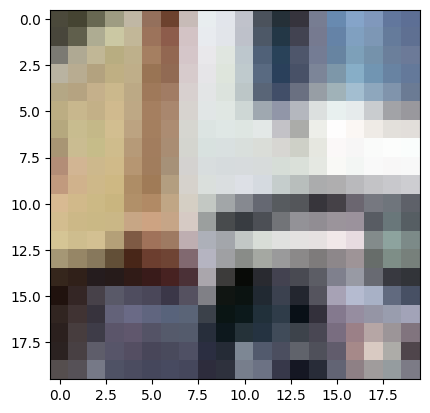

In [14]:
plt.imshow(h)

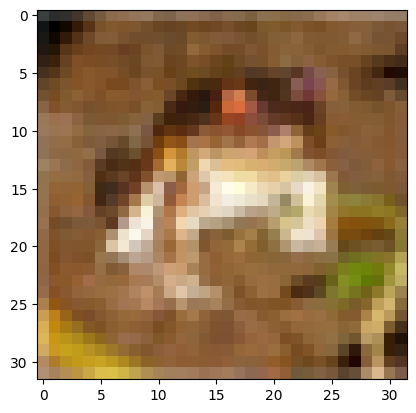

In [15]:
plt.imshow(d.images[0].reshape(3,32,32).transpose(1,2,0))

In [17]:
class Model(nn.Module):
    
    def __init__(self):
        super(Model, self).__init__()
        self.base = timm.create_model("resnet10t", pretrained=True)

    def forward(self, x):
        
        return self.base(x)

In [18]:
m = Model()

# m(torch.tensor(np.array(d.__getitem__(1)[0].reshape(1, h.shape[0], h.shape[1], h.shape[2]))))


In [19]:
d.get_loader(3)

In [39]:
class SimCLR_Loss(nn.Module):
    def __init__(self, batch_size, temperature):
        super(SimCLR_Loss, self).__init__()
        self.batch_size = batch_size
        self.temperature = temperature

        self.mask = self.mask_correlated_samples(batch_size)
        self.criterion = nn.CrossEntropyLoss(reduction="sum")
        self.similarity_f = nn.CosineSimilarity(dim=2)
        
        self.tot_neg = 0

    def mask_correlated_samples(self, batch_size):
        N = 2 * batch_size
        mask = torch.ones((N, N), dtype=bool)
        mask = mask.fill_diagonal_(0)
        
        for i in range(batch_size):
            mask[i, batch_size + i] = 0
            mask[batch_size + i, i] = 0
            
        return mask

    def forward(self, z_i, z_j):
        """
        We do not sample negative examples explicitly.
        Instead, given a positive pair, similar to (Chen et al., 2017), we treat the other 2(N − 1) augmented examples within a minibatch as negative examples.
        """
        
        N = 2 * self.batch_size #* self.world_size
        

        z = torch.cat((z_i, z_j), dim=0)

        sim = self.similarity_f(z.unsqueeze(1), z.unsqueeze(0)) / self.temperature
        
        #print(sim.shape)

        sim_i_j = torch.diag(sim, self.batch_size)
        sim_j_i = torch.diag(sim, -self.batch_size)
        
        
        # We have 2N samples, but with Distributed training every GPU gets N examples too, resulting in: 2xNxN
        positive_samples = torch.cat((sim_i_j, sim_j_i), dim=0).reshape(N, 1)
        negative_samples = sim[self.mask].reshape(N, -1)
        
        
        #SIMCLR
        labels = torch.from_numpy(np.array([0]*N)).reshape(-1).long() #.float()
        #labels was torch.zeros(N)
        logits = torch.cat((positive_samples, negative_samples), dim=1)
        loss = self.criterion(logits, labels)
        loss /= N
        
        return loss

In [44]:
from torch.optim.optimizer import Optimizer, required
import re

EETA_DEFAULT = 0.001


class LARS(Optimizer):
    """
    Layer-wise Adaptive Rate Scaling for large batch training.
    Introduced by "Large Batch Training of Convolutional Networks" by Y. You,
    I. Gitman, and B. Ginsburg. (https://arxiv.org/abs/1708.03888)
    """

    def __init__(
        self,
        params,
        lr=required,
        momentum=0.9,
        use_nesterov=False,
        weight_decay=0.0,
        exclude_from_weight_decay=None,
        exclude_from_layer_adaptation=None,
        classic_momentum=True,
        eeta=EETA_DEFAULT,
    ):
        """Constructs a LARSOptimizer.
        Args:
        lr: A `float` for learning rate.
        momentum: A `float` for momentum.
        use_nesterov: A 'Boolean' for whether to use nesterov momentum.
        weight_decay: A `float` for weight decay.
        exclude_from_weight_decay: A list of `string` for variable screening, if
            any of the string appears in a variable's name, the variable will be
            excluded for computing weight decay. For example, one could specify
            the list like ['batch_normalization', 'bias'] to exclude BN and bias
            from weight decay.
        exclude_from_layer_adaptation: Similar to exclude_from_weight_decay, but
            for layer adaptation. If it is None, it will be defaulted the same as
            exclude_from_weight_decay.
        classic_momentum: A `boolean` for whether to use classic (or popular)
            momentum. The learning rate is applied during momeuntum update in
            classic momentum, but after momentum for popular momentum.
        eeta: A `float` for scaling of learning rate when computing trust ratio.
        name: The name for the scope.
        """

        self.epoch = 0
        defaults = dict(
            lr=lr,
            momentum=momentum,
            use_nesterov=use_nesterov,
            weight_decay=weight_decay,
            exclude_from_weight_decay=exclude_from_weight_decay,
            exclude_from_layer_adaptation=exclude_from_layer_adaptation,
            classic_momentum=classic_momentum,
            eeta=eeta,
        )

        super(LARS, self).__init__(params, defaults)
        self.lr = lr
        self.momentum = momentum
        self.weight_decay = weight_decay
        self.use_nesterov = use_nesterov
        self.classic_momentum = classic_momentum
        self.eeta = eeta
        self.exclude_from_weight_decay = exclude_from_weight_decay
        # exclude_from_layer_adaptation is set to exclude_from_weight_decay if the
        # arg is None.
        if exclude_from_layer_adaptation:
            self.exclude_from_layer_adaptation = exclude_from_layer_adaptation
        else:
            self.exclude_from_layer_adaptation = exclude_from_weight_decay

    def step(self, epoch=None, closure=None):
        loss = None
        if closure is not None:
            loss = closure()

        if epoch is None:
            epoch = self.epoch
            self.epoch += 1

        for group in self.param_groups:
            weight_decay = group["weight_decay"]
            momentum = group["momentum"]
            eeta = group["eeta"]
            lr = group["lr"]

            for p in group["params"]:
                if p.grad is None:
                    continue

                param = p.data
                grad = p.grad.data

                param_state = self.state[p]

                # TODO: get param names
                # if self._use_weight_decay(param_name):
                grad += self.weight_decay * param

                if self.classic_momentum:
                    trust_ratio = 1.0

                    # TODO: get param names
                    # if self._do_layer_adaptation(param_name):
                    w_norm = torch.norm(param)
                    g_norm = torch.norm(grad)

                    device = g_norm.get_device()
                    trust_ratio = torch.where(
                        w_norm.gt(0),
                        torch.where(
                            g_norm.gt(0),
                            (self.eeta * w_norm / g_norm),
                            torch.Tensor([1.0]),
                        ),
                        torch.Tensor([1.0]),
                    ).item()

                    scaled_lr = lr * trust_ratio
                    if "momentum_buffer" not in param_state:
                        next_v = param_state["momentum_buffer"] = torch.zeros_like(
                            p.data
                        )
                    else:
                        next_v = param_state["momentum_buffer"]

                    next_v.mul_(momentum).add_(scaled_lr, grad)
                    if self.use_nesterov:
                        update = (self.momentum * next_v) + (scaled_lr * grad)
                    else:
                        update = next_v

                    p.data.add_(-update)
                else:
                    raise NotImplementedError

        return loss

    def _use_weight_decay(self, param_name):
        """Whether to use L2 weight decay for `param_name`."""
        if not self.weight_decay:
            return False
        if self.exclude_from_weight_decay:
            for r in self.exclude_from_weight_decay:
                if re.search(r, param_name) is not None:
                    return False
        return True

    def _do_layer_adaptation(self, param_name):
        """Whether to do layer-wise learning rate adaptation for `param_name`."""
        if self.exclude_from_layer_adaptation:
            for r in self.exclude_from_layer_adaptation:
                if re.search(r, param_name) is not None:
                    return False
        return True

In [45]:
class Trainer:
    
    def __init__(self, dataset,batch_size):
        self.data = dataset
        self.model = Model()
#         self.criterion = nn.CosineSimilarity()
        self.loss_fn = SimCLR_Loss(batch_size, 0.5)
        self.train_loader = self.data.get_loader(batch_size)
        
        self.optimizer = LARS(
            [params for params in self.model.parameters() if params.requires_grad],
            lr=0.2,
            weight_decay=1e-6,
#             exclude_from_weight_decay=["batch_normalization", "bias"],
        )

        
    
    def __call__(self, n_epochs, batch_size):
        
        loss_vals = []
        for _ in range(n_epochs):
            for img1, img2 in self.train_loader:    
                img1 = torch.tensor(img2, dtype=torch.float32)            
                img2 = torch.tensor(img2, dtype=torch.float32)




                out1 = self.model(img1)            
                out2 = self.model(img2)

                loss = self.loss_fn(out1, out2)

                loss.backward()

                self.optimizer.step()

                loss_vals.append(loss.item())
                
        return loss_vals
    


In [46]:
t = Trainer(d,3)

In [ ]:
history = t(1,3)

/tmp/ipykernel_32/69562272.py:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img1 = torch.tensor(img2, dtype=torch.float32)
/tmp/ipykernel_32/69562272.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img2 = torch.tensor(img2, dtype=torch.float32)
/tmp/ipykernel_32/907875437.py:129: UserWarning: This overload of add_ is deprecated:
	add_(Number alpha, Tensor other)
Consider using one of the following signatures instead:
	add_(Tensor other, *, Number alpha) (Triggered internally at ../torch/csrc/utils/python_arg_parser.cpp:1485.)
  next_v.mul_(momentum).add_(scaled_lr, grad)
